In [2]:
import pandas as pd

# Define the path to the CSV file
properties_2016 = pd.read_csv('OneDrive/Desktop/properties_2016.csv', low_memory=False)
train_2016 = pd.read_csv('OneDrive/Desktop/train_2016_v2.csv', low_memory=False)
# Read the CSV file into a DataFrame
df_train = train_2016.merge(properties_2016, how='left', on='parcelid')

# Display the first few rows of the DataFrame
print("DataFrame head:")
print(df_train.head())

num_rows = df_train.shape[0]
print(f"The DataFrame has {num_rows} rows.")




DataFrame head:
   parcelid  logerror transactiondate  airconditioningtypeid  \
0  11016594    0.0276      2016-01-01                    1.0   
1  14366692   -0.1684      2016-01-01                    NaN   
2  12098116   -0.0040      2016-01-01                    1.0   
3  12643413    0.0218      2016-01-02                    1.0   
4  14432541   -0.0050      2016-01-02                    NaN   

   architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
0                       NaN           NaN          2.0         3.0   
1                       NaN           NaN          3.5         4.0   
2                       NaN           NaN          3.0         2.0   
3                       NaN           NaN          2.0         2.0   
4                       NaN           NaN          2.5         4.0   

   buildingclasstypeid  buildingqualitytypeid  ...  numberofstories  \
0                  NaN                    4.0  ...              NaN   
1                  NaN              

In [3]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns

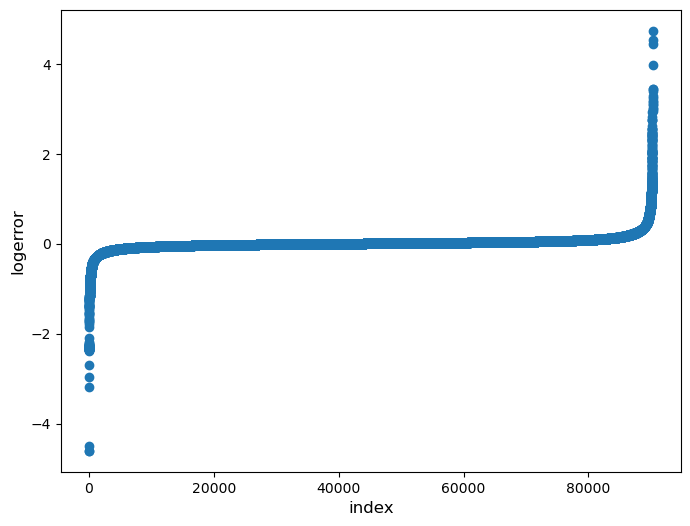

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(range(df_train.shape[0]), np.sort(df_train.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

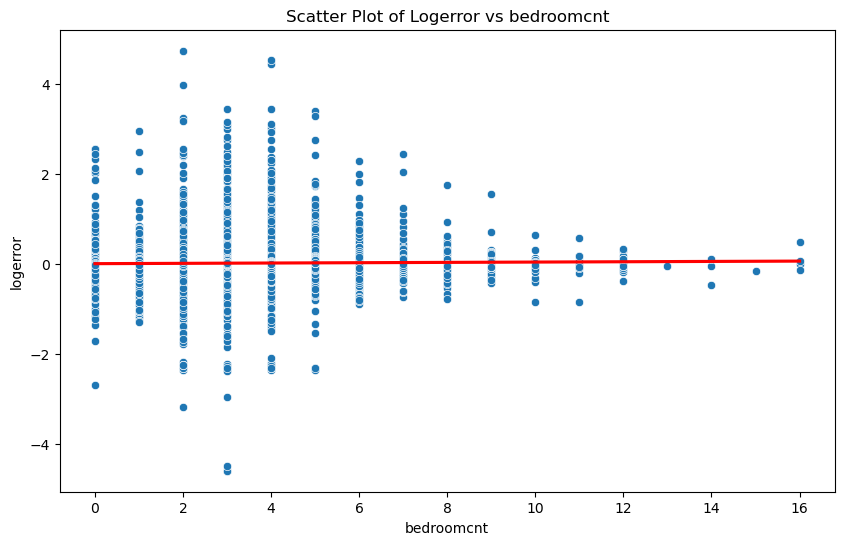

In [7]:
variable_of_interest = 'bedroomcnt'  # Replace with your column name

# Check if the columns exist in the DataFrame
if 'logerror' in df_train.columns and variable_of_interest in df_train.columns:
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_train[variable_of_interest], y=df_train['logerror'])

    # Add a regression line
    sns.regplot(x=df_train[variable_of_interest], y=df_train['logerror'], scatter=False, color='red')

    # Set the title and labels
    plt.title('Scatter Plot of Logerror vs ' + variable_of_interest)
    plt.xlabel(variable_of_interest)
    plt.ylabel('logerror')

    # Show the plot
    plt.show()

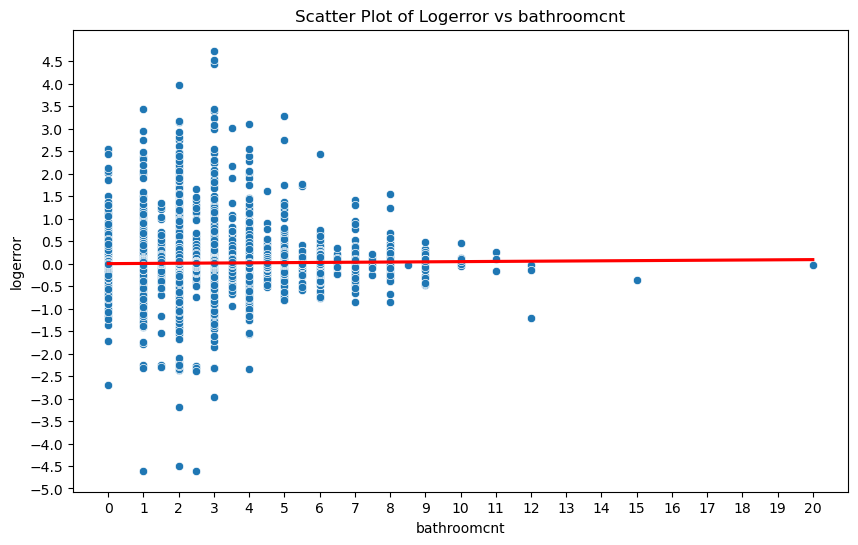

In [8]:
variable_of_interest = 'bathroomcnt'  # Replace with your column name

# Check if the columns exist in the DataFrame
if 'logerror' in df_train.columns and variable_of_interest in df_train.columns:
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_train[variable_of_interest], y=df_train['logerror'])

    # Add a regression line
    sns.regplot(x=df_train[variable_of_interest], y=df_train['logerror'], scatter=False, color='red')

    # Set the title and labels
    plt.title('Scatter Plot of Logerror vs ' + variable_of_interest)
    plt.xlabel(variable_of_interest)
    plt.ylabel('logerror')
     # Set x-axis ticks to increment by 1
    x_ticks = range(0, int(df_train[variable_of_interest].max()) + 1)
    plt.xticks(x_ticks)

    # Set y-axis ticks to increment by 0.5
    y_ticks = [i * 0.5 for i in range(int(df_train['logerror'].min() // 0.5), int(df_train['logerror'].max() // 0.5) + 1)]
    plt.yticks(y_ticks)

    # Show the plot
    plt.show()

In [9]:
# Define the filter condition
condition = (df_train['logerror'] > 1) | (df_train['logerror'] < -1)

# Apply the condition to filter the DataFrame
filtered_df = df_train[condition]

print(filtered_df.shape[0])

342


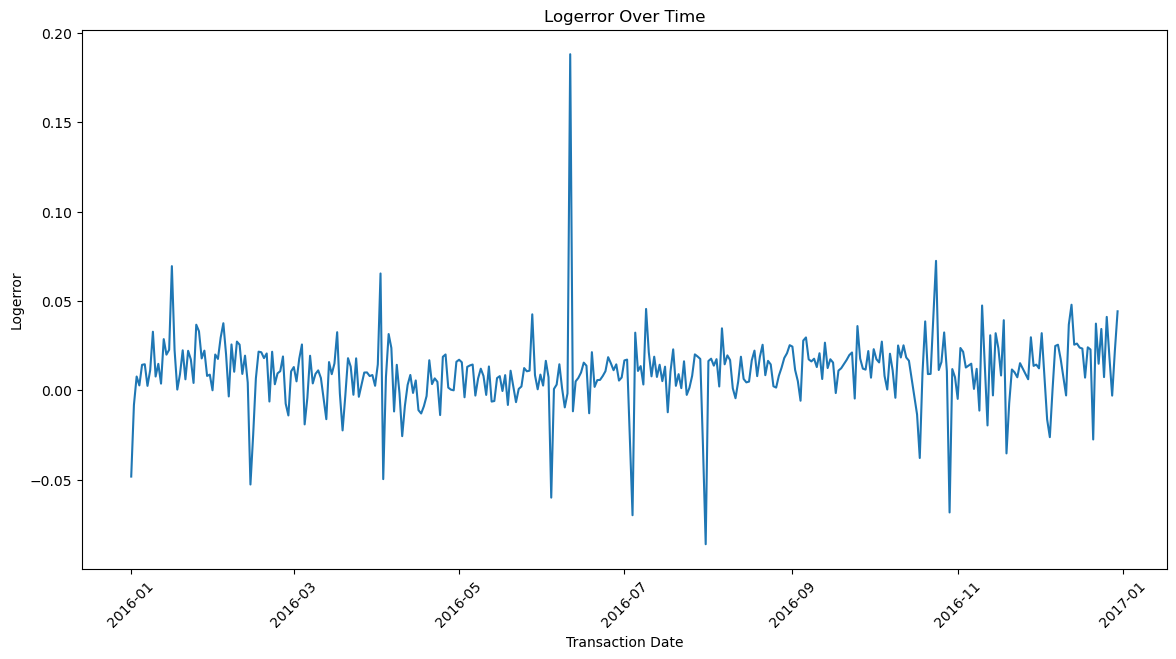

In [10]:
# Ensure the date column is in datetime format
df_train['transactiondate'] = pd.to_datetime(df_train['transactiondate'])

# Aggregate logerror by date (e.g., taking the mean logerror per day)
df_aggregated = df_train.groupby('transactiondate')['logerror'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(14, 7))
sns.lineplot(x='transactiondate', y='logerror', data=df_aggregated)

# Set the title and labels
plt.title('Logerror Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Logerror')

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

The DataFrame has 90275 rows.
Train MAE: 0.03256505654020123
Test MAE: 0.08203043576965671
Train MSE: 0.005461764225704838
Test MSE: 0.03665346362107254
Train R2: 0.7859487043675044
Test R2: -0.08218275204438763


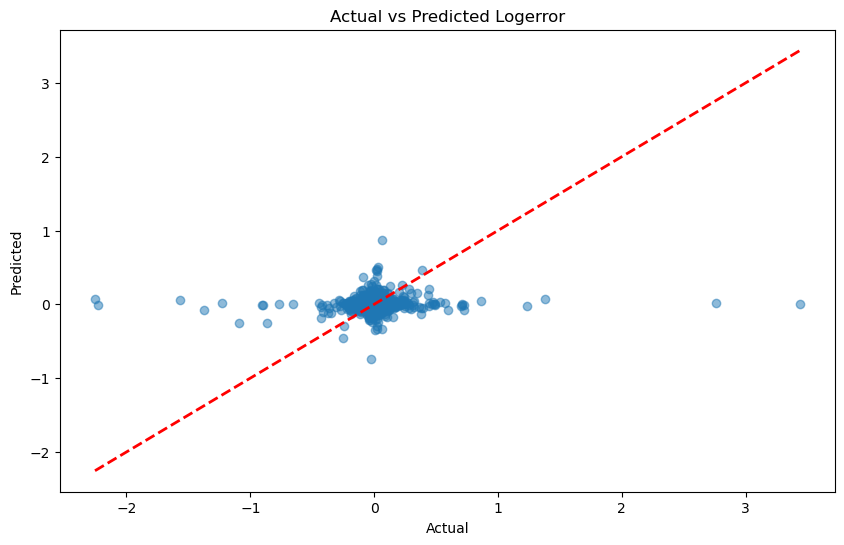

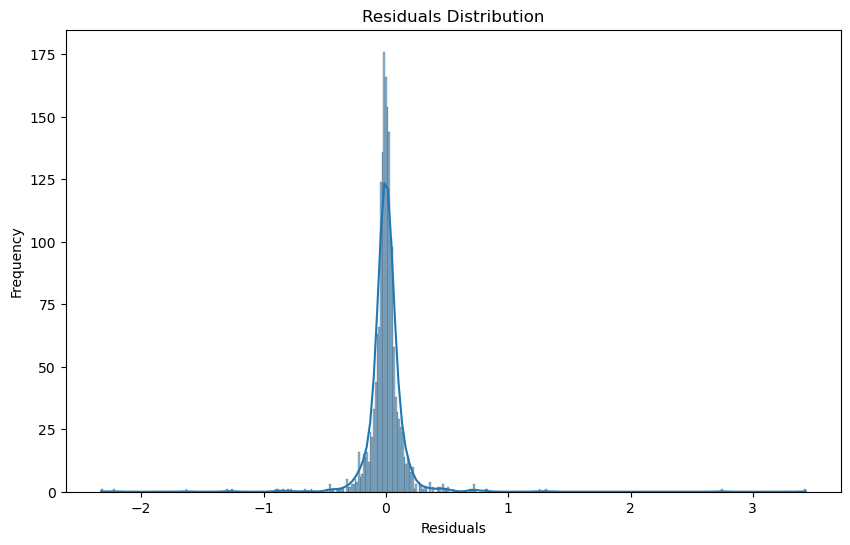

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
properties_2016 = pd.read_csv('OneDrive/Desktop/properties_2016.csv', low_memory=False)
train_2016 = pd.read_csv('OneDrive/Desktop/train_2016_v2.csv', low_memory=False)

# Merge the datasets
df_train = train_2016.merge(properties_2016, how='left', on='parcelid')

# Display the number of rows in the DataFrame
num_rows = df_train.shape[0]
print(f"The DataFrame has {num_rows} rows.")

# Drop rows where logerror is missing
df_train = df_train.dropna(subset=['logerror'])

# Drop unnecessary columns
df_train = df_train.drop(columns=['parcelid', 'transactiondate'])

# Select numeric and categorical columns
numeric_features = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('logerror')  # Remove target column
categorical_features = df_train.select_dtypes(include=['object', 'bool']).columns.tolist()

# Convert boolean columns to strings
for col in categorical_features:
    df_train[col] = df_train[col].astype(str)

# Reduce the dataset size
df_train_sample = df_train.sample(frac=0.1, random_state=42)  # Use 10% of the data for faster processing

# Split the data into features and target
X = df_train_sample.drop(columns=['logerror'])
y = df_train_sample['logerror']

# Preprocessing for numeric data: impute missing values and scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data: impute missing values and encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=10, random_state=42)  # Use fewer estimators for faster processing

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train MAE: {mae_train}")
print(f"Test MAE: {mae_test}")
print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
print(f"Train R2: {r2_train}")
print(f"Test R2: {r2_test}")

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Logerror')
plt.show()

# Residual plot
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()


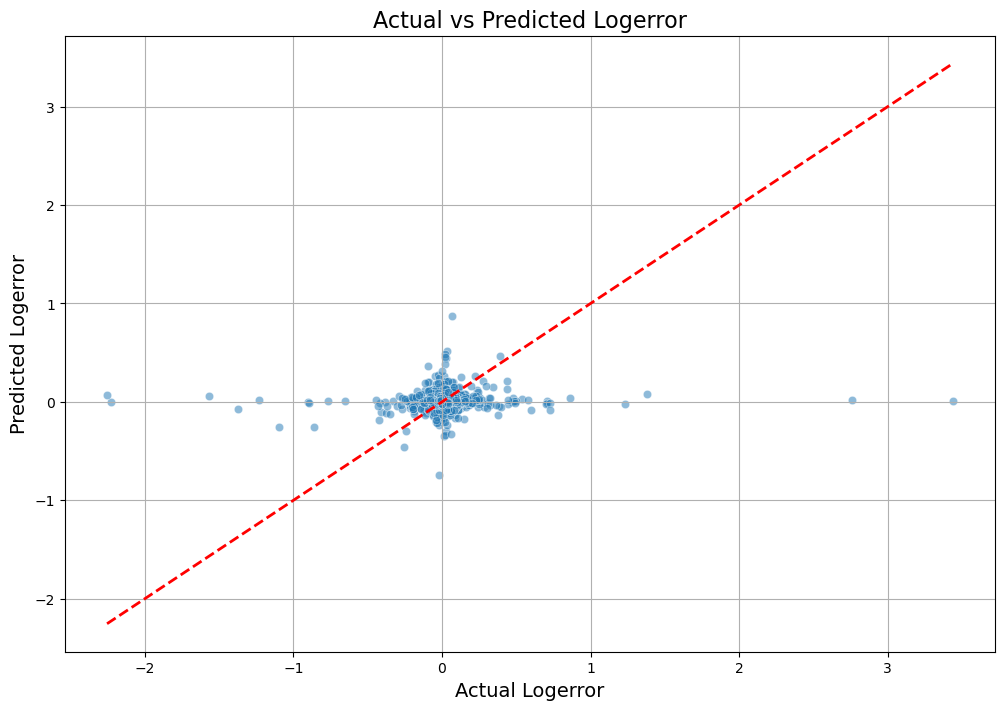

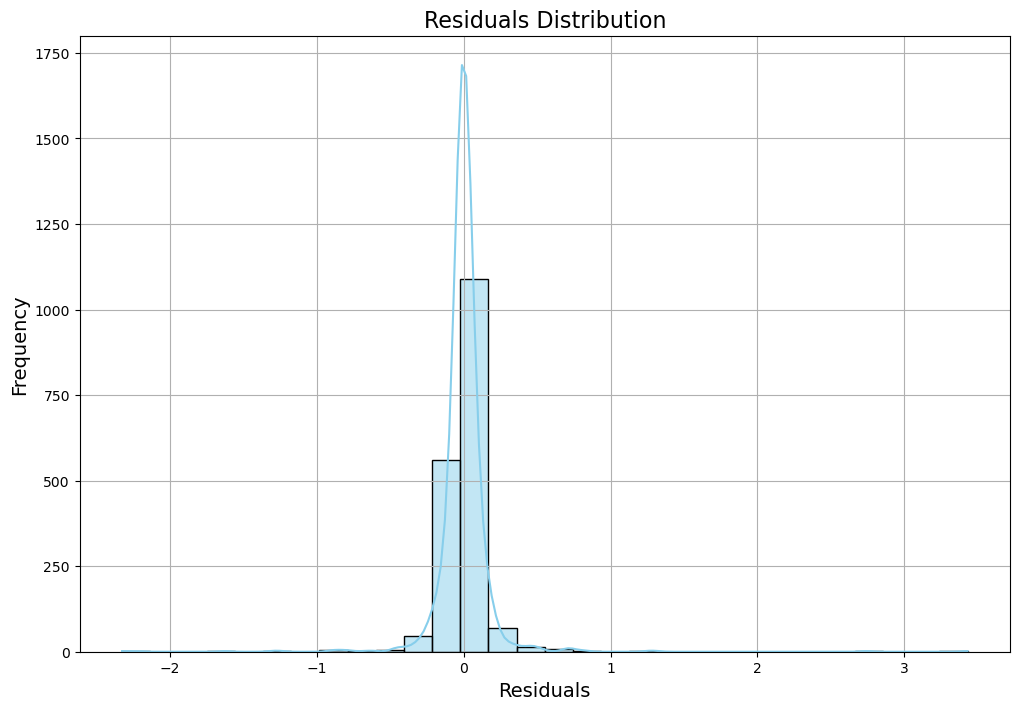

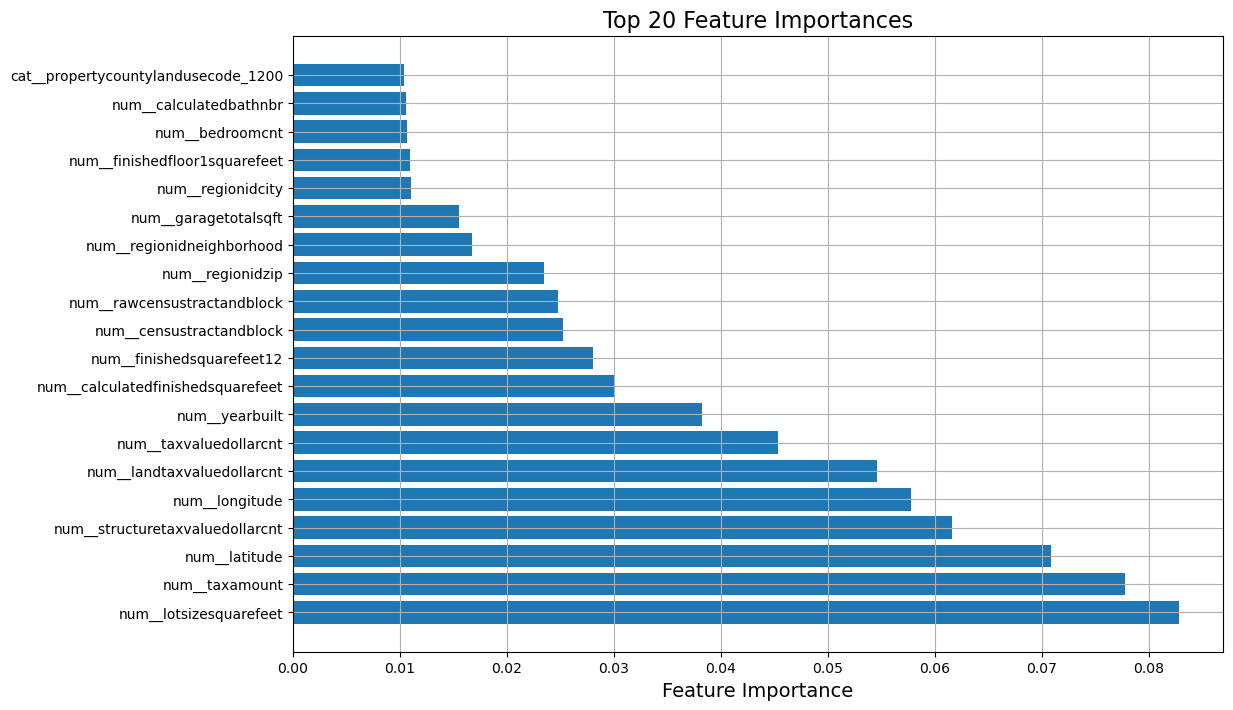

In [20]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred_test, alpha=0.5, edgecolors='w', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Logerror', fontsize=14)
plt.ylabel('Predicted Logerror', fontsize=14)
plt.title('Actual vs Predicted Logerror', fontsize=16)
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred_test
plt.figure(figsize=(12, 8))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Residuals Distribution', fontsize=16)
plt.grid(True)
plt.show()

# Feature importance plot
importances = model.feature_importances_
features = preprocessor.get_feature_names_out()
sorted_indices = importances.argsort()[::-1]
top_indices = sorted_indices[:20]  # Top 20 features

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_indices)), importances[top_indices], align='center')
plt.yticks(range(len(top_indices)), [features[i] for i in top_indices])
plt.xlabel('Feature Importance', fontsize=14)
plt.title('Top 20 Feature Importances', fontsize=16)
plt.grid(True)
plt.show()